In [2]:
# load packages
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import xarray as xr
from utilities_spacial_vars import *

In [54]:
# s = pd.read_csv('gaa2_climate_2022.csv')

# load range map data
geo = gpd.read_file('../Data/GAA2/GAA2_allspecies.gdb', rows=slice(21, 23))

# load bioclimatic variables
bioclim = xr.open_dataset('../Data/ClimateVariables/bioclimatic_variables.nc')

In [55]:
i = 0
g = geo.iloc[[i]]

g.explore()

In [83]:
g

,sci_name,presence,origin,seasonal,compiler,yrcompiled,citation,generalisd,legend,Shape_Length,Shape_Area,geometry
0,Choerophryne proboscidea,1,1,1,Louise Hobin,2019,IUCN (International Union for Conservation of ...,0,Extant (resident),21.05597,2.715377,"MULTIPOLYGON (((144.17148 -3.81489, 144.17141 ..."


0.6779698880132872


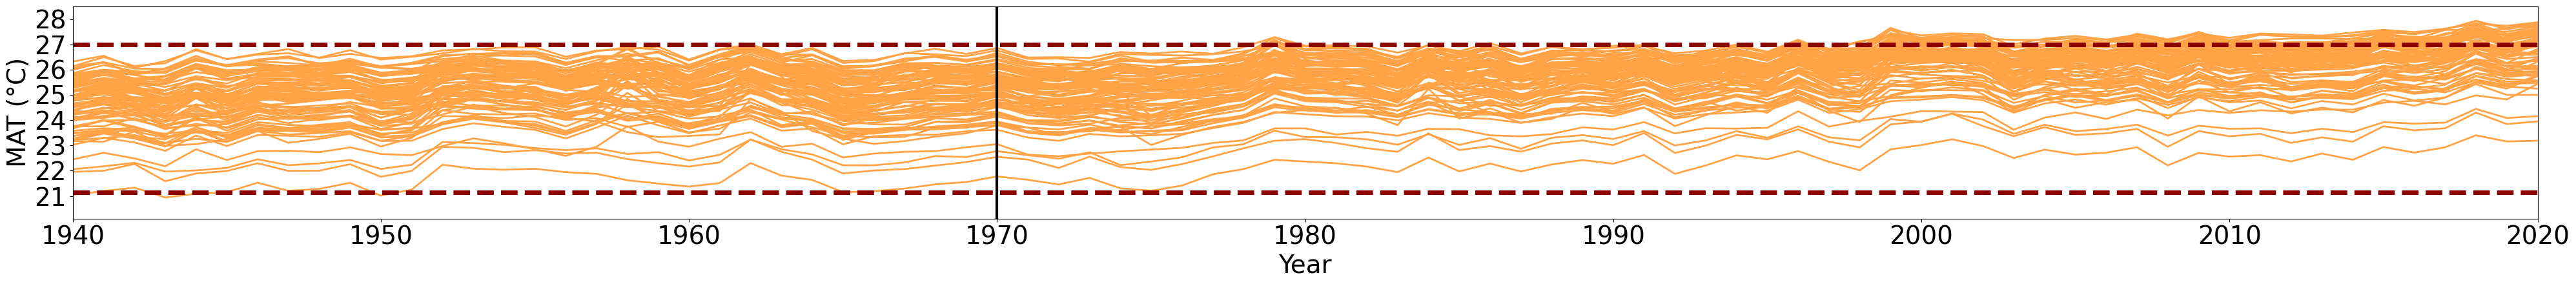

In [159]:
data = bioclim['MAT']

grid = GridCalc(data, g, 0.5)

var_window20y = grid.get_window(data.sel(year=slice(2000,2020)))
min_hist, max_hist = grid.calc_hist_limits(data.sel(year=slice(1940, 1970)), nsig=3)
nichefrac = grid.calc_fraction_in_niche(min_hist, max_hist, var_window20y)
print(nichefrac)

# visualize 
plt.figure(figsize=(40,4.5))
var_in_range = grid.data_window.where(grid.mask == 1)
var_in_range_flat = var_in_range.values.reshape(var_in_range.shape[0], -1)
light_orange_hex = '#ffa346'
_ = plt.plot(var_in_range.year, var_in_range_flat, linewidth=2, color=light_orange_hex)
_ = plt.axhline(min_hist, color='darkred', linestyle='--', linewidth=5)
_ = plt.axhline(max_hist, color='darkred', linestyle='--', linewidth=5)
# plot black vertical line at 1970
_ = plt.axvline(1970, color='black', linewidth=3)
plt.ylim(20.1,28.5)
plt.xlim(1940,2020)
plt.ylabel('MAT (°C)', size=28)
plt.xlabel('Year', size=28)
# xticks size 20
plt.xticks(size=28)
# yticks size 20
plt.yticks(size=28)
# plt.title('Mean Annual Temperature (MAT) in geographic range', size=32)
plt.title('')
plt.tight_layout()

# plt.savefig('nichefrac.png', dpi=600, transparent=True)
# save svg
plt.savefig('nichefrac.svg', format='svg', transparent=True)

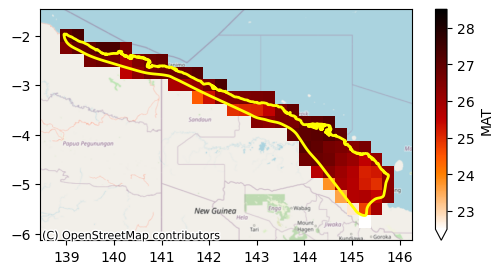

In [161]:
import contextily as ctx
xmin = grid.xmin
xmax = grid.xmax
ymin = grid.ymin
ymax = grid.ymax

dat_window = grid.data_window.sel(year=slice(2000,2020)).mean(dim='year')
mask2 = dat_window.copy()
mask2.attrs['long_name'] = 'mask'
mask2.values = grid.mask

## plot
fig, ax = plt.subplots(figsize=(6,3))
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
geo.plot(ax=ax, facecolor='none', edgecolor='yellow', linewidth=2)
ctx.add_basemap(ax=ax, crs=geo.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
dat_window.where(grid.mask==1).plot.imshow(ax=ax, cmap='gist_heat_r', vmin=22.5, vmax=28.5)

# mask2.plot.imshow(ax=ax, alpha= 0.5, cmap='greens_alpha1')
ax.set_xlabel('')
ax.set_ylabel('')
# ax.set_title('Rasterizing Mean Annual Temperature (MAT) in geographic range', size=32)
ax.set_title('')
plt.savefig('rasterize.svg', format='svg', transparent=True, dpi=600)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 2., 1., 1., 2., 1., 1., 1., 2., 1., 2., 3., 1., 3., 0., 3., 0.,
        2., 3., 5., 3., 6., 4., 6., 4., 3., 6., 4., 3., 2., 2., 4.]),
 array([19.40973854, 19.48903084, 19.56832504, 19.64761734, 19.72690964,
        19.80620384, 19.88549614, 19.96479034, 20.04408264, 20.12337494,
        20.20266914, 20.28196144, 20.36125374, 20.44054794, 20.51984024,
        20.59913445, 20.67842674, 20.75771904, 20.83701324, 20.91630554,
        20.99559784, 21.07489204, 21.15418434, 21.23347855, 21.31277084,
        21.39206314, 21.47135735, 21.55064964, 21.62994194, 21.70923615,
        21.78852844, 21.86782074, 21.94711494, 22.02640724, 22.10570145,
        22.18499374, 22.26428604, 22.34

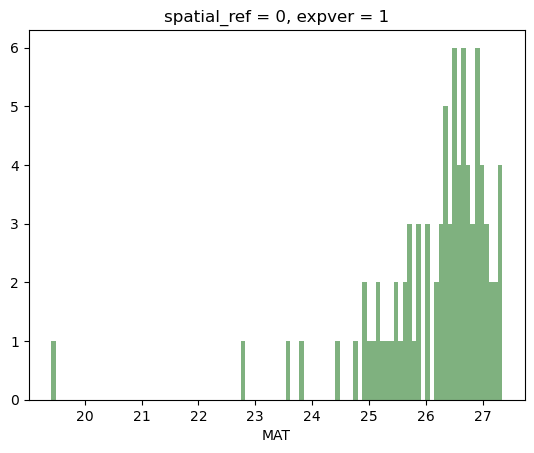

In [88]:
dat_window.where(grid.mask==1).plot.hist(bins=100, alpha=0.5, color='darkgreen')

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# from matplotlib.pyplot.colormaps import register

# get colormap
ncolors = 256
color_array = plt.get_cmap('Greens')(range(ncolors))

# change alpha values
color_array[:,-1] = np.linspace(0.0,1.0,ncolors)

# create a colormap object
map_object = LinearSegmentedColormap.from_list(name='greens_alpha1',colors=color_array)

# register this new colormap with matplotlib
plt.colormaps.register(cmap=map_object)

# show some example data
# f,ax = plt.subplots()
# h = ax.imshow(np.random.rand(100,100),cmap='rainbow_alpha')
# plt.colorbar(mappable=h)

In [35]:
# drop nan  values from var_in_range_flat
# add dimension at axis 0
mask_adddimension0 = 
mask_ext = np.repeat(grid.mask, var_in_range.shape[0], axis=0)
# plt.hist(var_in_range[mask_ext])
mask_ext.shape

(1577, 32)

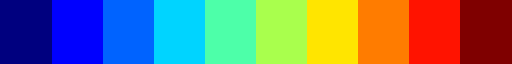

In [117]:
var_in_range

<xarray.DataArray 'MAT' (year: 83, latitude: 5, longitude: 5)>
array([[[      nan,       nan,       nan,       nan,       nan],
        [      nan,       nan,       nan,       nan,       nan],
        [      nan,       nan, 3.2788067,       nan,       nan],
        [      nan,       nan,       nan,       nan,       nan],
        [      nan,       nan,       nan,       nan,       nan]],

       [[      nan,       nan,       nan,       nan,       nan],
        [      nan,       nan,       nan,       nan,       nan],
        [      nan,       nan, 3.8726985,       nan,       nan],
        [      nan,       nan,       nan,       nan,       nan],
        [      nan,       nan,       nan,       nan,       nan]],

       [[      nan,       nan,       nan,       nan,       nan],
        [      nan,       nan,       nan,       nan,       nan],
        [      nan,       nan, 4.524464 ,       nan,       nan],
        [      nan,       nan,       nan,       nan,       nan],
        [      nan,       nan,       nan,       nan,       nan]],

       ...,

       [[      nan,       nan,       nan,       nan,       nan],
        [      nan,       nan,       nan,       nan,       nan],
        [      nan,       nan, 4.703839 ,       nan,       nan],
        [      nan,       nan,       nan,       nan,       nan],
        [      nan,       nan,       nan,       nan,       nan]],

       [[      nan,       nan,       nan,       nan,       nan],
        [      nan,       nan,       nan,       nan,       nan],
        [      nan,       nan, 2.439446 ,       nan,       nan],
        [      nan,       nan,       nan,       nan,       nan],
        [      nan,       nan,       nan,       nan,       nan]],

       [[      nan,       nan,       nan,       nan,       nan],
        [      nan,       nan,       nan,       nan,       nan],
        [      nan,       nan, 4.4441237,       nan,       nan],
        [      nan,       nan,       nan,       nan,       nan],
        [      nan,       nan,       nan,       nan,       nan]]],
      dtype=float32)
Coordinates:
  * longitude    (longitude) float32 -68.75 -68.5 -68.25 -68.0 -67.75
  * latitude     (latitude) float32 -27.75 -27.5 -27.25 -27.0 -26.75
    spatial_ref  int64 ...
  * year         (year) int64 1940 1941 1942 1943 1944 ... 2019 2020 2021 2022
    expver       int32 ...

In [ ]:
m